In [188]:
import pandas as pd
import numpy as np

# Plotting
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv(
    filepath_or_buffer="Math-Students.csv"
)

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 4 hours)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1 or more)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related to the course subject, Math:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second-period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

### 🧠 SECTION 1 — Data Understanding and Cleaning

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [191]:
for column in df.columns:
    number_na = df[column].isnull().sum()
    if number_na > 1:
        print(f"Pay attentin to {column} column.\n \
              It has {number_na} missing values")

In [192]:
# Show min and max for numeric columns
df_range_num = (
    df
    .select_dtypes(include="number")
    .agg(["min", "max"])
)

print("Min-Max Range for Numeric Columns:")
print(df_range_num)

Min-Max Range for Numeric Columns:
     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
min   15     0     0           1          1         0       1         1   
max   22     4     4           4          4         3       5         5   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
min      1     1     1       1         0   3   0   0  
max      5     5     5       5        75  19  19  20  


In [193]:
data_dictonary_summary = dict()

for column in df.columns:
    number_of_unique = len(df[column].unique())
    column_type = df.dtypes[column]
    example_values = df.loc[:5, column].to_list()

    data_dictonary_summary[column] = [
        number_of_unique,
        column_type,
        example_values
    ]

In [194]:
pd.DataFrame(data_dictonary_summary).melt()

,variable,value
0,school,2
1,school,object
2,school,"[GP, GP, GP, GP, GP, GP]"
3,sex,2
4,sex,object
...,...,...
94,G2,int64
95,G2,"[6, 5, 8, 14, 10, 15]"
96,G3,18
97,G3,int64


In [195]:
df["avg_period_grade"] = (df["G1"] + df["G2"]) / 2

In [196]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_period_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,8.5
395,MS,M,18,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
396,MS,M,17,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
397,MS,M,19,U,GT3,T,4,4,teacher,other,...,3,2,1,2,4,0,8,7,7,7.5


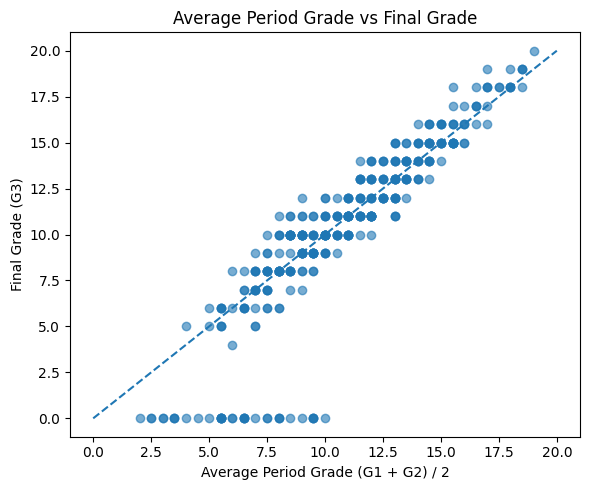

In [197]:
plt.figure(figsize=(6, 5))
plt.scatter(df["avg_period_grade"], df["G3"], alpha=0.6)
plt.plot([0, 20], [0, 20], linestyle="--")
plt.xlabel("Average Period Grade (G1 + G2) / 2")
plt.ylabel("Final Grade (G3)")
plt.title("Average Period Grade vs Final Grade")
plt.tight_layout()
plt.show()

### 📊 SECTION 2 — Target Variable Exploration

In [198]:
df.loc[:, ["G1", "G2", "G3"]]

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
394,8,9,9
395,8,7,7
396,8,7,7
397,8,7,7


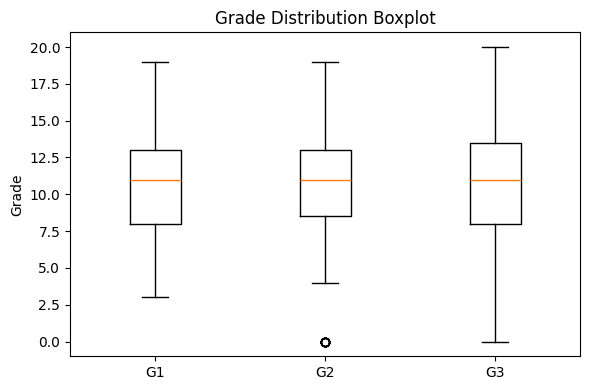

In [199]:
plt.figure(figsize=(6, 4))

plt.boxplot(
    [df["G1"], df["G2"], df["G3"]],
    tick_labels=["G1", "G2", "G3"]
)

plt.ylabel("Grade")
plt.title("Grade Distribution Boxplot")
plt.tight_layout()
plt.show()


In [200]:
school_mapper = {
    'GP': 'Gabriel Pereira',
    'MS': 'Mousinho da Silveira'
}

df["school"] = df["school"].replace(school_mapper)

In [201]:
stats = (
    df
    .groupby(by="school")
    .agg(
        mean=("G3", "mean"),
        median=("G3", "median"),
        std=("G3", "std")
    )
)

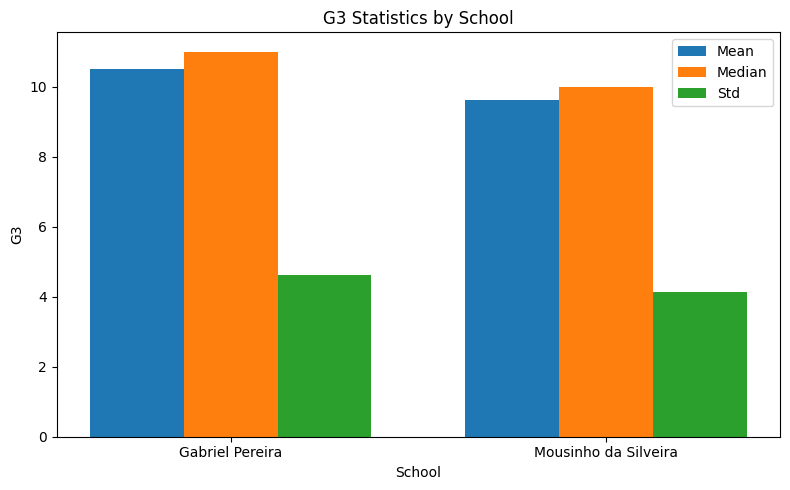

In [202]:
x = np.arange(len(stats.index))
width = 0.25

plt.figure(figsize=(8, 5))

plt.bar(x - width, stats["mean"], width, label="Mean")
plt.bar(x,         stats["median"], width, label="Median")
plt.bar(x + width, stats["std"], width, label="Std")

plt.xticks(x, stats.index)
plt.xlabel("School")
plt.ylabel("G3")
plt.title("G3 Statistics by School")
plt.legend()
plt.tight_layout()
plt.show()


In [203]:
sex_mapper = {
    'F': 'Female',
    'M': 'Male'
}

df["sex"] = df["sex"].replace(sex_mapper)

<Figure size 500x400 with 0 Axes>

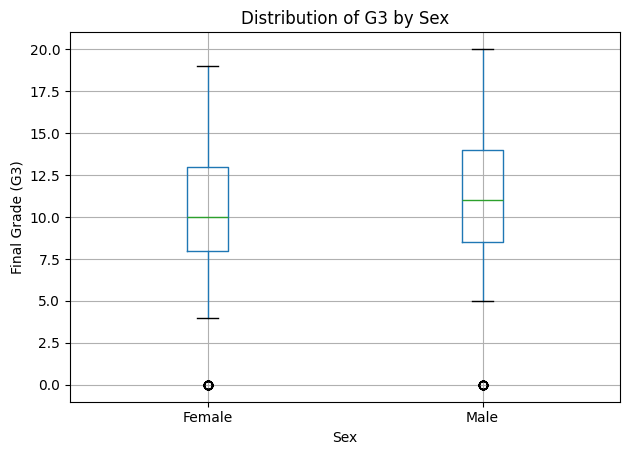

In [204]:
plt.figure(figsize=(5, 4))

df.boxplot(
    column="G3",
    by="sex"
)

plt.xlabel("Sex")
plt.ylabel("Final Grade (G3)")
plt.title("Distribution of G3 by Sex")
plt.suptitle("")  # remove automatic pandas title
plt.tight_layout()
plt.show()

In [205]:
stats = (
    df
    .groupby(by="school")
    .agg(
        number_of_students=("school", "count"), 
        female_students=("sex", lambda sex: (sex == "Female").sum()),
        male_students=("sex", lambda sex: (sex == "Male").sum())

    )
)

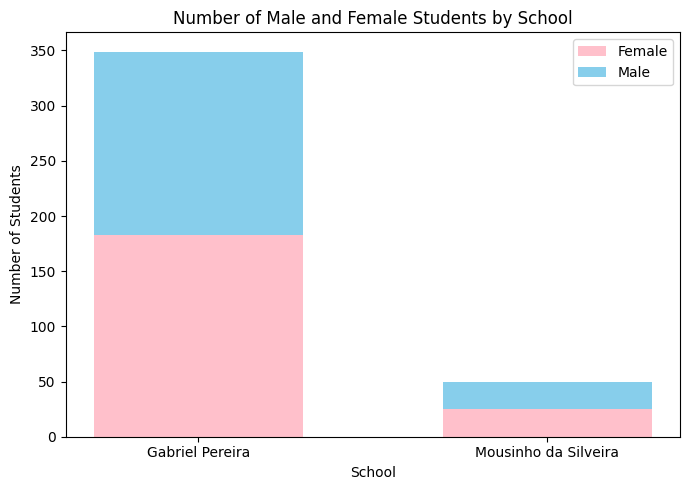

In [206]:
x = np.arange(len(stats.index))  # positions
width = 0.6

plt.figure(figsize=(7, 5))

plt.bar(x, stats["female_students"], width, label="Female", color="pink")
plt.bar(x, stats["male_students"], width, bottom=stats["female_students"], label="Male", color="skyblue")

plt.xticks(x, stats.index)
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Number of Male and Female Students by School")
plt.legend()
plt.tight_layout()
plt.show()


In [207]:
# Lets assume that we have some passing criteria "score"
min_score = 10

def pass_or_not(score):
    return 1 if score >= min_score else 0 

df["pass_flag"] = df["G3"].apply(func=pass_or_not)

In [208]:
pass_rate = df[df["pass_flag"] == 1]["pass_flag"].sum() / len(df)
pass_rate

np.float64(0.6641604010025063)

### 🔍 SECTION 3 — GroupBy & Aggregation

#### Why Did They Choose this University?

In [209]:
df["reason"].value_counts()

reason
course        147
home          109
reputation    107
other          36
Name: count, dtype: int64

In [210]:
(
    df
    .groupby(by="school")
    .agg(
        course=("reason", lambda reason: (reason == "course").sum()), 
        home=("reason", lambda reason: (reason == "home").sum()),
        reputation=("reason", lambda reason: (reason == "reputation").sum()), 
        other=("reason", lambda reason: (reason == "other").sum())
    )
)

,course,home,reputation,other
school,,,,
Gabriel Pereira,124,98,100,27
Mousinho da Silveira,23,11,7,9


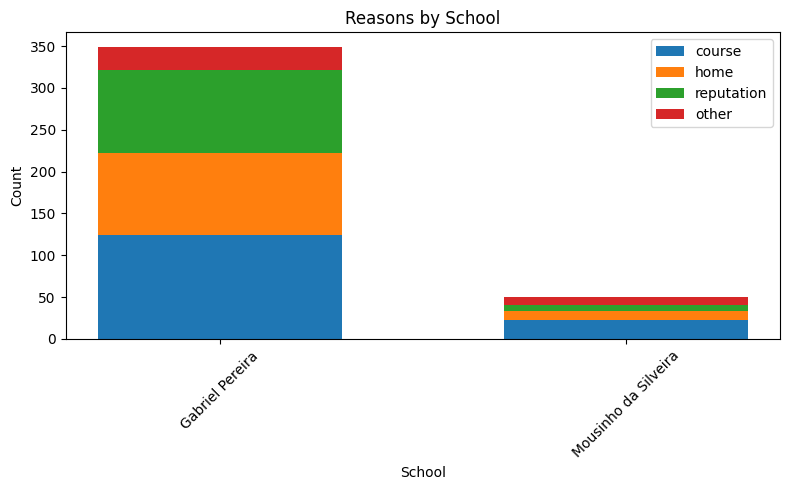

In [211]:
df_grouped = (
    df
    .groupby("school")
    .agg(
        course=("reason", lambda reason: (reason == "course").sum()), 
        home=("reason", lambda reason: (reason == "home").sum()),
        reputation=("reason", lambda reason: (reason == "reputation").sum()), 
        other=("reason", lambda reason: (reason == "other").sum())
    )
    .reset_index()
)

x = np.arange(len(df_grouped["school"]))
width = 0.6

plt.figure(figsize=(8, 5))

plt.bar(x, df_grouped["course"], width, label="course")
plt.bar(x, df_grouped["home"], width, bottom=df_grouped["course"], label="home")
plt.bar(
    x,
    df_grouped["reputation"],
    width,
    bottom=df_grouped["course"] + df_grouped["home"],
    label="reputation"
)
plt.bar(
    x,
    df_grouped["other"],
    width,
    bottom=df_grouped["course"] + df_grouped["home"] + df_grouped["reputation"],
    label="other"
)

plt.xticks(x, df_grouped["school"], rotation=45)
plt.xlabel("School")
plt.ylabel("Count")
plt.title("Reasons by School")
plt.legend()
plt.tight_layout()
plt.show()

#### Mean G3 and Sample Size by Study Time

In [212]:
df["studytime"].value_counts()

studytime
2    202
1    105
3     65
4     27
Name: count, dtype: int64

In [213]:
stats = (
    df
    .groupby(by="studytime")
    .agg(
        mean_g3=("G3", "mean"),
        no_of_students=("studytime", "count")
    )

    .reset_index()
)

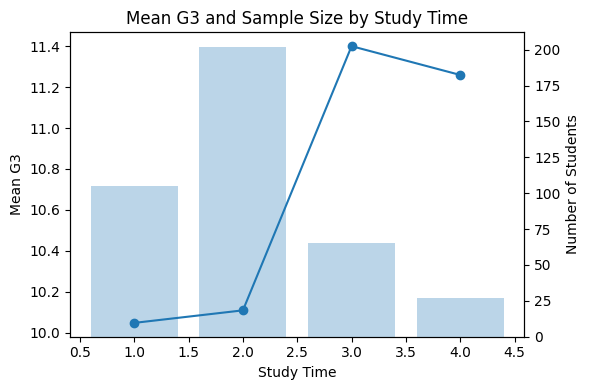

In [214]:
fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(stats["studytime"], stats["mean_g3"], marker="o")
ax1.set_xlabel("Study Time")
ax1.set_ylabel("Mean G3")

ax2 = ax1.twinx()
ax2.bar(stats["studytime"], stats["no_of_students"], alpha=0.3)
ax2.set_ylabel("Number of Students")

plt.title("Mean G3 and Sample Size by Study Time")
plt.tight_layout()
plt.show()


#### Mean G3 by Number of Failures

In [218]:
df["failures"].value_counts()

failures
0    316
1     50
2     17
3     16
Name: count, dtype: int64

In [219]:
(
    df
    .groupby(by="failures")
    .agg(
        mean_g3=("G3", "mean")
    )
)

,mean_g3
failures,
0,11.199367
1,8.120000
2,6.235294
3,5.687500


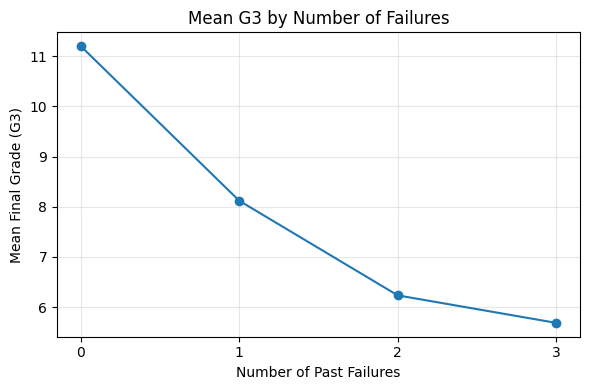

In [220]:
stats = (
    df
    .groupby("failures")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

plt.figure(figsize=(6, 4))

plt.plot(
    stats["failures"],
    stats["mean_g3"],
    marker="o"
)

plt.xlabel("Number of Past Failures")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 by Number of Failures")
plt.xticks(stats["failures"])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [222]:
(
    df
    .groupby(by=["sex", "school"])
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

,sex,school,mean_g3
0,Female,Gabriel Pereira,9.972678
1,Female,Mousinho da Silveira,9.920000
2,Male,Gabriel Pereira,11.060241
3,Male,Mousinho da Silveira,9.320000


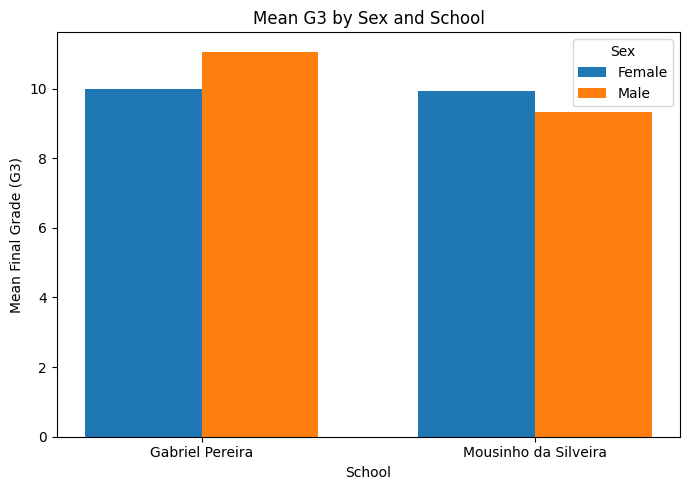

In [ ]:
stats = (
    df
    .groupby(["sex", "school"])
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

pivot = stats.pivot(index="school", columns="sex", values="mean_g3")

x = np.arange(len(pivot.index))
width = 0.35

plt.figure(figsize=(7, 5))

for i, sex in enumerate(pivot.columns):
    plt.bar(
        x + i * width,
        pivot[sex],
        width,
        label=sex
    )

plt.xticks(x + width / 2, pivot.index)
plt.xlabel("School")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 by Sex and School")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()
